In [1]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import time
import heatmap_setup as hm
import numpy as np

from SES_setup import *
from utils import *
from style import *

SES_setup loaded globally


In [2]:
def calculate_WC_add_steadystate_comparison(PARAMS, num, threshold=0.):
    phonons = np.linspace(0.5, 50, 60)
    ti =time.time()
    rho_add = []
    rho_add_shift = []
    rho_nonadd = []
    rho_wc = []
    rho_wc_shift = []
    rho_wcs = []
    op_list = []
    for j, alpha in enumerate(phonons):
        #PARAMS = get_converged_N(PARAMS, err_threshold=5., min_N=3,max_N=11, silent=True, exc_diff_N=False)
        
        PARAMS.update({'alpha_1':alpha, 'alpha_2': alpha})
        #energies, states = exciton_states(PARAMS)
        H, L, PARAMS = get_H_and_L(PARAMS,silent=True, threshold=0.)
        H_wc, L_ns, L_s = get_H_and_L_wc(PARAMS['H_sub'], PARAMS)
        #_, L_wc_shift, L_s_ = get_H_and_L_wc(H[0], PARAMS)
        #rho_add_shift.append(steadystate(H[1], [L['add-shift']]))
        rho_add.append(steadystate(H[1], [L['add']]))
        rho_nonadd.append(steadystate(H[1], [L['nonadd']]))
        #rho_wc_shift.append(steadystate(H[0], [L_wc_shift])) # shift in wc LVN
        rho_wc.append(steadystate(H[0], [L_ns])) # shift in wc LVN
        #rho_wcs.append(steadystate(H[0], [L_s]))
        op_list.append(make_expectation_operators(PARAMS))
        if j in [1,10,20,30,40,49]:
            print(alpha)
        #print ss.diag()
    data_dict = {}
    filename = 'DATA/Gamma_w0_dep/3ls_{}'.format(num)
    PARAM_names = ['rho_nonadd', 'rho_add', 
                   'rho_wc', 'op_list', 'phonons', 'PARAMS']
    scope = locals() # Lets eval below use local variables, not global
    data_dict.update(dict((name, eval(name, scope)) for name in PARAM_names))
    print("Calculation took {} seconds".format(time.time()-ti))
    try:
        save_obj(data_dict, filename)
        print( "Filename: "+filename)
    except Exception as e:
        print("Could not save file because: {}".format(e))
    return data_dict



In [3]:
def calculate_expval(rho_list, op_list, obs='OO'):
    return [(op_list[i][obs]*rho).tr() for i, rho in enumerate(rho_list)]

def plot_dynamics(data_dict):
    PARAMS = data_dict['PARAMS']
    # code goes here to take in and plot dynamics for wc, add and non-add
    phonons =data_dict['phonons']
    
    #labels = ['wc shift','s', 'Redfield', 'Add. Shift', 'Add.', 'Non-add.']
    labels = ['Redfield', 'Add.', 'Non-add.']
    f, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2, 2, sharex=True, figsize=(14,8))
    # ['_add_shift', '_wc_shift', '_wcs']
    for i, suff in enumerate(['_wc', '_add', '_nonadd']):
        if suff in ['_wc_shift', '_wc', '_wcs']:
            alpha=1
            ls='solid'
            op_list = [make_expectation_operators(PARAMS, weak_coupling=True, shift=True)]*len(phonons)
        else:
            op_list =data_dict['op_list']
            alpha=0.5
            #ls='dotted'
        #GS pop
        ax1.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='OO'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax1.set_ylabel(r"GS")
        ax1.set_xlim(phonons[0], phonons[-1])
        ax1.legend()
        #DS pop
        ax2.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='dark'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax2.set_xlim(phonons[0], phonons[-1])
        ax2.set_ylabel(r"DS")
        ax2.legend()
        
        ax3.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='bright'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax3.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax3.set_ylabel(r"BS")
        ax3.set_xlim(phonons[0], phonons[-1])
        ax3.legend()
        
        ax4.plot(phonons, calculate_expval(data_dict['rho'+suff], op_list, obs='eig_x'), 
                 label=labels[i], alpha=alpha, ls=ls)
        ax4.set_xlabel(r"$\alpha_1$, $\alpha_2$ $(cm^{-1})$")
        ax4.set_ylabel(r"$\Re \langle\{+\rangle\!\langle -|\rangle$")
        ax4.set_xlim(phonons[0], phonons[-1])
        ax4.legend()



# Low $\omega_0$

In [10]:
T_ph = 77.
w_2 = 1.4*ev_to_inv_cm
bias = 10e-3*ev_to_inv_cm #0.0000001*ev_to_inv_cm
V = 10e-3*ev_to_inv_cm #0.00001*ev_to_inv_cm
alpha = 1.
T_EM = 6000.
alpha_EM = 5.309e-3 # inv_ps_to_inv_cm *10^-3

In [11]:
N =7
#wc = 50.
w_0 = 40e-3*ev_to_inv_cm
Gamma = 10e-3*ev_to_inv_cm

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_1 = calculate_WC_add_steadystate_comparison(PARAMS, '1', threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 3244.7815747261047 seconds
Filename: DATA/Gamma_w0_dep/3ls_1


In [12]:
data_dict_1 =load_obj("DATA/Gamma_w0_dep/3ls_1")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


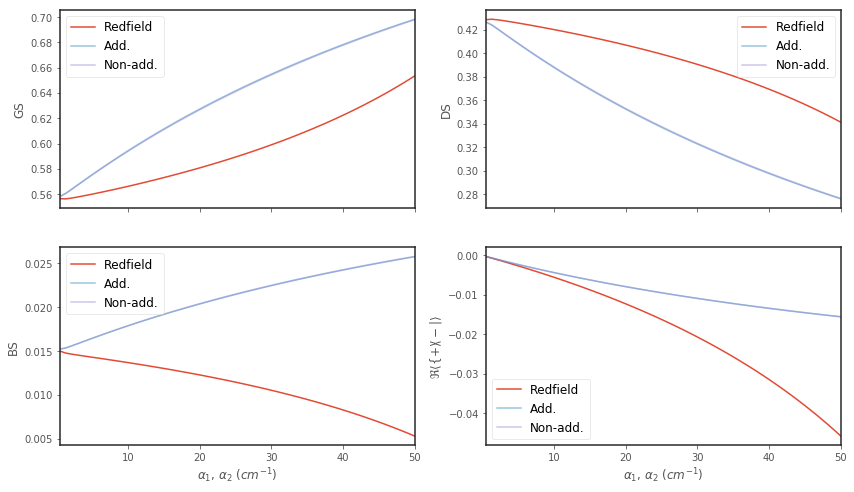

In [13]:
plot_dynamics(data_dict_1)

In [14]:
N =7
#wc = 50.
w_0 = 40e-3*ev_to_inv_cm
Gamma = 1*w_0

PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_2 = calculate_WC_add_steadystate_comparison(PARAMS, 2, threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 3515.3838658332825 seconds
Filename: DATA/Gamma_w0_dep/3ls_2


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


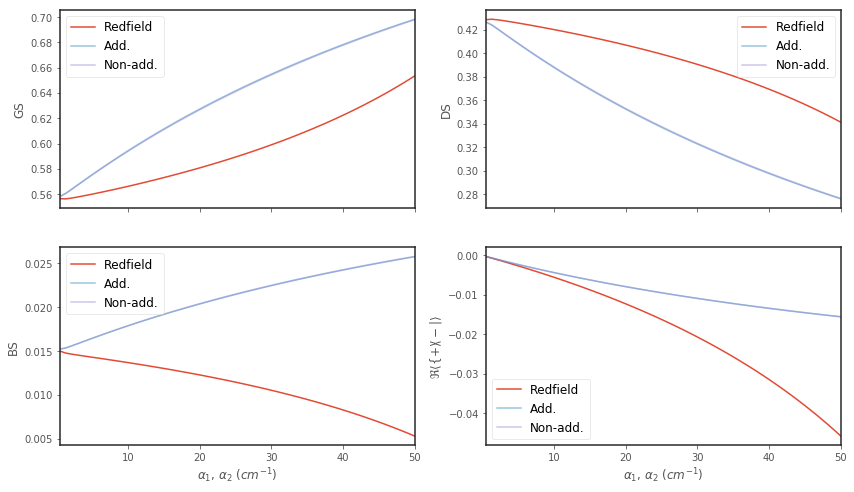

In [15]:
data_dict_2 =load_obj("DATA/Gamma_w0_dep/3ls_2")
plot_dynamics(data_dict_1)

# larger $\omega_0$

In [20]:
w_0 = 500.
Gamma = 200.
N=6
alpha=10.
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_2 = calculate_WC_add_steadystate_comparison(PARAMS, 2, threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 2944.7763431072235 seconds
Filename: DATA/WC_validity_ss/3ls_2


In [19]:
w_0 = 483.
Gamma = 200.
N=5
alpha=10.
T_ph = 77.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)

data_dict_2a = calculate_WC_add_steadystate_comparison(PARAMS, '2a', threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 1222.3003840446472 seconds
Filename: DATA/Gamma_w0_dep/3ls_2a


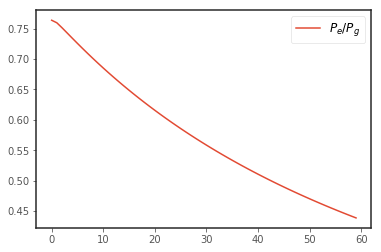

In [21]:
data_dict_2a =load_obj("DATA/Gamma_w0_dep/3ls_2a")
def plot_population_ratio(data_dict):
    PARAMS = data_dict['PARAMS']
    ops = make_expectation_operators(PARAMS)
    pd = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['dark']])
    pb = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['bright']])
    pg = np.array([i.tr() for i in data_dict['rho_nonadd']*ops['OO']])
    plt.plot(((pd)/pg).real, label='$P_e/P_g$')
    plt.legend()
plot_population_ratio(data_dict_2a)

In [8]:
def B_for_min_decay(PARAMS):
    Delta = PARAMS['V']*2
    eta = sqrt(Delta**2 + PARAMS['bias']**2)
    fp = sqrt(eta+PARAMS['bias'])
    fm = sqrt(eta-PARAMS['bias'])
    return (Delta/(2*PARAMS['bias']))*((4*PARAMS['bias']**2)/(Delta**2*PARAMS['mu']))*((fp+fm)/(fp-fm))
print(B_for_min_decay(PARAMS))

4.2663256059105015


In [17]:
data_dict_2 =load_obj("DATA/WC_validity_ss/3ls_2")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


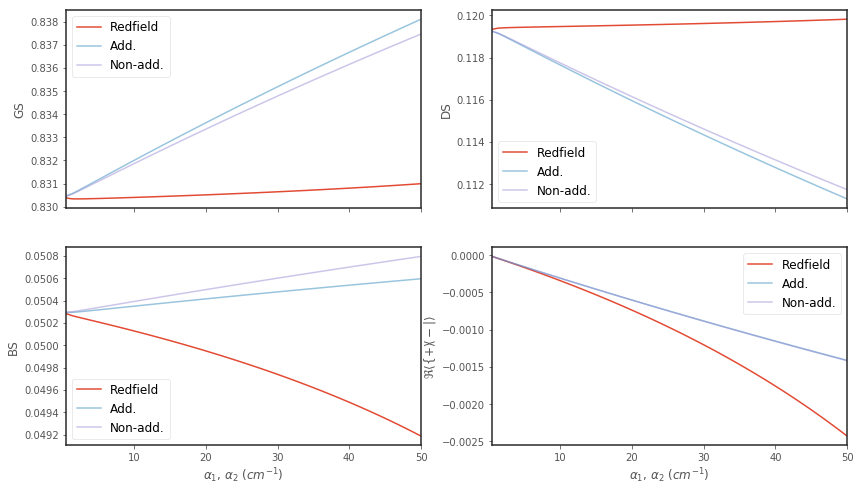

In [16]:
plot_dynamics(data_dict_2)

# Low $T_{ph}$

In [ ]:
w_0 = 200.
Gamma = 2*w_0 #200.

T_ph = 77.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_3 = calculate_WC_add_steadystate_comparison(PARAMS, 3, threshold=0.)

In [ ]:
data_dict_3 =load_obj("DATA/WC_validity_ss/3ls_3")

In [ ]:
plot_dynamics(data_dict_3)

# very high $\omega_0$ (underdamped), but not larger than site energy

In [12]:
w_0 = 5000.
Gamma = 200.
N=4
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                              V = V, alpha=alpha,
                              T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                              num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_4 = calculate_WC_add_steadystate_comparison(PARAMS, 4, threshold=0.)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 8700.722556829453 seconds
Filename: DATA/WC_validity_ss/3ls_4


In [19]:
data_dict_4 =load_obj("DATA/WC_validity_ss/3ls_4")

/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


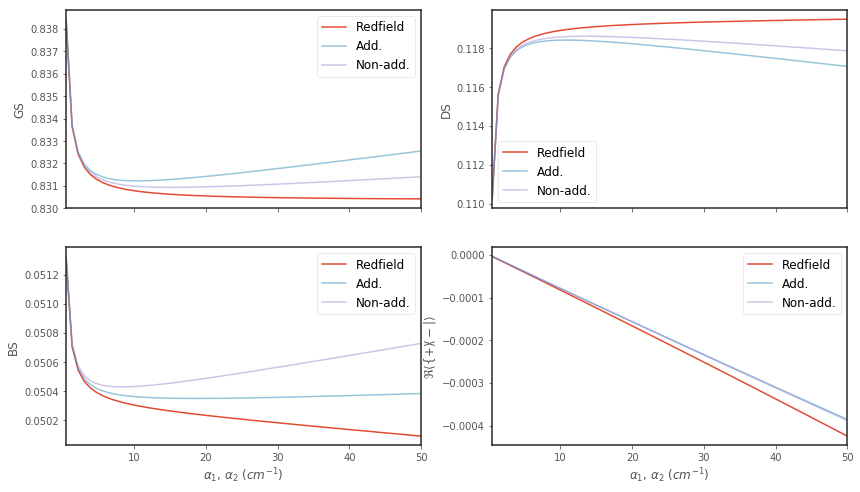

In [20]:
plot_dynamics(data_dict_4)

In [ ]:
print (beta_f(300), beta_f(77), beta_f(100), beta_f(150))

# very high $\omega_0$ (overdamped), but not larger than site energy

In [5]:
w_0 = 5000. # 
Gamma = (w_0**2)/53.
N=4
T_ph = 300.
PARAMS = PARAMS_setup(bias=bias, w_2=w_2, 
                      V = V, alpha=alpha,
                      T_EM=T_EM, T_ph=T_ph, alpha_EM=alpha_EM, shift=True,
                      num_cpus=4, N=N, Gamma=Gamma, w_0=w_0,
                      silent=True, exc_diff=0)
data_dict_5 = calculate_WC_add_steadystate_comparison(PARAMS, 5, threshold=1e-8)

1.3389830508474576
8.889830508474576
17.279661016949152
25.66949152542373
34.059322033898304
41.610169491525426
Calculation took 60436.80293703079 seconds
Filename: DATA/WC_validity_ss/3ls_5


/Users/admin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


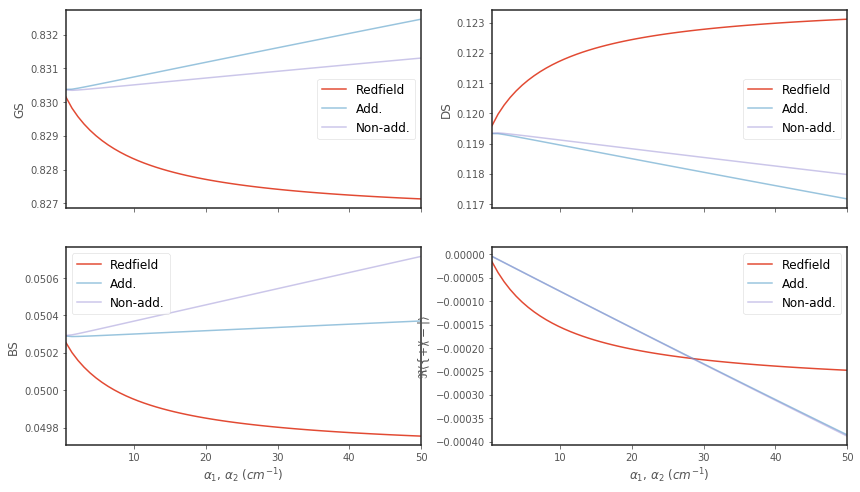

In [21]:
data_dict_4 =load_obj("DATA/WC_validity_ss/3ls_5")
plot_dynamics(data_dict_5)

No RC mapping performed yet. Using 0.5*pi*alpha/2


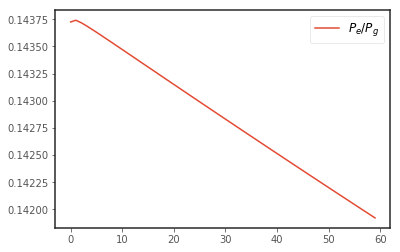